# Laboratorio 3
### RNN

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler

In [6]:
sunspots = pd.read_csv('sunspots.csv')
sunspots.head()

,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0


In [7]:
sunspots['Month'] = pd.to_datetime(sunspots['Month'])

# escalate data
scaler = MinMaxScaler(feature_range=(0, 1))
sunspots['Sunspots'] = scaler.fit_transform(sunspots['Sunspots'].values.reshape(-1, 1))

# Preparación de los datos para la RNN
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step):
        X.append(dataset[i:(i + time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)

time_step = 3
X, y = create_dataset(sunspots['Sunspots'].values.reshape(-1, 1), time_step)

# Reshape for [samples, time steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

In [8]:
# Create model
model = Sequential()
model.add(SimpleRNN(50, return_sequences=False, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# train the model
model.fit(X, y, epochs=100, batch_size=1, verbose=1)

# predict
predictions = model.predict(X)
predictions = scaler.inverse_transform(predictions)

# data inverse transform for comparison
y = scaler.inverse_transform(y.reshape(-1, 1))

Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2817/2817 ━━━━━━━━━━━━━━━━━━━━ 1s 293us/step - loss: 0.0080
Epoch 2/100
2817/2817 ━━━━━━━━━━━━━━━━━━━━ 1s 295us/step - loss: 0.0047
Epoch 3/100
2817/2817 ━━━━━━━━━━━━━━━━━━━━ 1s 282us/step - loss: 0.0041
Epoch 4/100
2817/2817 ━━━━━━━━━━━━━━━━━━━━ 1s 274us/step - loss: 0.0039
Epoch 5/100
2817/2817 ━━━━━━━━━━━━━━━━━━━━ 1s 279us/step - loss: 0.0041
Epoch 6/100
2817/2817 ━━━━━━━━━━━━━━━━━━━━ 1s 275us/step - loss: 0.0042
Epoch 7/100
2817/2817 ━━━━━━━━━━━━━━━━━━━━ 1s 272us/step - loss: 0.0042
Epoch 8/100
2817/2817 ━━━━━━━━━━━━━━━━━━━━ 1s 267us/step - loss: 0.0044
Epoch 9/100
2817/2817 ━━━━━━━━━━━━━━━━━━━━ 1s 266us/step - loss: 0.0042
Epoch 10/100
2817/2817 ━━━━━━━━━━━━━━━━━━━━ 1s 271us/step - loss: 0.0039
Epoch 11/100
2817/2817 ━━━━━━━━━━━━━━━━━━━━ 1s 269us/step - loss: 0.0039
Epoch 12/100
2817/2817 ━━━━━━━━━━━━━━━━━━━━ 1s 264us/step - loss: 0.0043
Epoch 13/100
2817/2817 ━━━━━━━━━━━━━━━━━━━━ 1s 264us/step - loss: 0.0042
Epoch 14/100
2817/2817 ━━━━━━━━━━━━━━━━━━━━ 1s 262us/step - loss: 0.0042

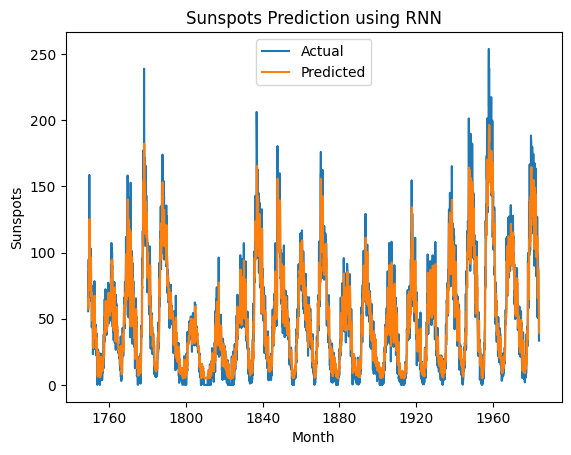

In [9]:
# graph results
plt.plot(sunspots['Month'][time_step:], y, label='Actual')
plt.plot(sunspots['Month'][time_step:], predictions, label='Predicted')
plt.xlabel('Month')
plt.ylabel('Sunspots')
plt.title('Sunspots Prediction using RNN')
plt.legend()
plt.show()